# DSP Homework 4, matriculation number: 11144732
Generated on: 16.12.2021 at: 11:27:17 h.
### Please execute the next code cells to start your lab/homework!

In [1]:
# iPython magic command to load the matplotlib library and
# select the notebook graphics frontend
%matplotlib inline
# import necessary functions from the thkdss library
from thkdsp import *
from dsplab import *
# import audio related functions from the audio submodule
from thkdsp.audio import play_signal, wav2dtsignal
# import some definitions and functions from numpy, the python library for Matlab-like array processing
from numpy import arange, shape, array, zeros, size, ones, isscalar

In [2]:
# set font for Matplotlib to 'Times New Roman' if that is available
set_mpl_font()
# set default font size for Matplotlib, change to different value if labels are too large or too small
set_mpl_fontsize(16)

In [3]:
# start homework
dsp_hw4_start()

TH Köln University of Applied Sciences
Course:  Digital Signal Processing
Homework 4
 
You are about to start Homework 4 !
Please read and follow the instructions exactly as stated!
 
You will be asked to enter your matriculation number.
Please make sure that you enter it correctly!
 
Please enter your 8-digit matriculation number: 11144732
Your matriculation number is:  11144732
Is this correct? yes/no: yes
Starting output to log file for Homework 4 for matriculation number: 11144732
dsp_hw4_11144732.log
Activating auto-logging. Current session state plus future input saved.
Filename       : dsp_hw4_11144732.log
Mode           : append
Output logging : True
Raw input log  : True
Timestamping   : True
State          : active
Info: 2562463468
Homework 4 for matriculation number 11144732 continued at: 2021-12-18 22:24:22.915789


### Enter as many code cells as you need below!
### Note: Your notebook needs to be modular enough, i.e. it has to consist of enough code cells!
### Otherwise, your submission will be considered as not sufficient!


In [723]:
from thkdsp import *
from numpy import *
from thkdsp.ztransform import residue, zplane

### Problem 5.8 (c) Determine the system response g[n] if the input is s[n] = sin(2πn/4)ε[n].


In [724]:
# For all cases:

n = lrange(-5, 20)

From the analytical computation for the given input s[n], G(z) was obtained as:

###  G(z) = ${5 \over 4} {z \over z^2 + z + {1 \over 2}}$

In [725]:
# Hence we can write the numerator and denominator coefficients as

b_step = array([0, 1.25, 0])
a_step = array([1, 1, 0.5])

In [726]:
r, p, c = residue(b_step, a_step)

In [727]:
r

array([0.625+0.625j, 0.625-0.625j])

In [728]:
p

array([-0.5+0.5j, -0.5-0.5j])

In [729]:
c

array([0.])

#### Computing the step response 

In [730]:
g_n = c*delta(n)

#### Adding exponential signals

In [731]:
for k in range(0, len(p)):
    g_n = g_n + step(n-1)*(r[k]*p[k]**(n-1))
    
g_n = real(g_n)

#### Plot of the system response g[n]

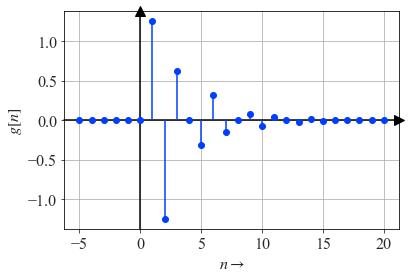

In [732]:
fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"$g[n]$")

In [733]:
# Using dfilter:

### Computing the system response g[n] using the dfilter 

From the analytical computation, H(z) was obtained as:

###  H(z) = ${5 \over 4} {z^2 + 1 \over z^2 + z + {1 \over 2}}$

In [734]:
# Hence we can write the numerator and denominator coefficients as

b = array([1.25, 0, 1.25])
a = array([1, 1, 0.5])

In [735]:
s_n= np.sin((2*np.pi*n)/4)*step(n)

In [736]:
g_n = dfilter(b, a, s_n)

#### Plot of the system response g[n]

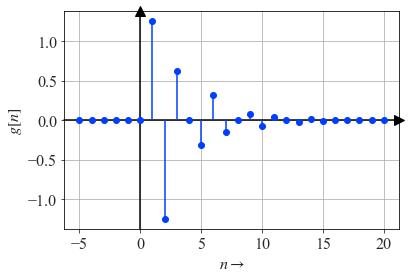

In [737]:
fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"$g[n]$")

In [738]:
# Problem 5.9

### Problem 5.9 For the linear, causal, and time-invariant systems described by the difference equations below, determine: 
#### (i) the impulse response representation, 
#### (ii) the system function representation, 
#### (iii) the pole-zero plot, and 
#### (iv) the output g[n], 
#### if the input signal is s[n] = 2$(0.9)^n$ε[n].

In [739]:
# For all cases in Problem 5.9: 

######  For the input signal s[n], the Z transform was obtained as $S(z) =  {2z \over {z-0.9}}$

###### And for all cases G(z) was obtained as G(z) = H(z).S(z)

In [740]:
# a) g[n] = (s[n]−2s[n−1] +s[n−2])/4

##### The System function was obtained as H(z) = ${ {1 \over 4} {(z^2-2z+1)} \over z^2}$

In [741]:
# Hence the numerator and denominator coefficients for H(z) can be written as :

b = array([0.25, -0.5, 0.25])
a = array([1, 0, 0])

#### The pole-zero plot:

(<Figure size 198.425x198.425 with 1 Axes>,
 <AxesSubplot:xlabel='$\\mathrm{Re}\\{z\\}$', ylabel='$\\mathrm{Im}\\{z\\}$'>)

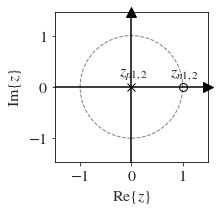

In [742]:
zplane(b, a)

In [743]:
# Obtainiing the output g[n]:

### The outpu signal g[n]:

#### With the given input s[n], G(z) was obtained as G(z) = ${ {1 \over 2} {(z^2-2z+1)} \over z^2-0.9z}$

In [744]:
# Hence we can write its coefficients as 

b_out = array([0.5, -1, 0.5])
a_out = array([1, -0.9, 0])

In [745]:
r, p, c = residue(b_out, a_out)

In [746]:
r

array([ 0.00555556, -0.55555556])

In [747]:
p

array([0.9, 0. ])

In [748]:
c

array([0.5])

In [749]:
g_n = c*delta(n)

<ipython-input-750-f04ae1adfac8>:2: RuntimeWarning: divide by zero encountered in power
  g_n = g_n + step(n-1)*(r[k]*p[k]**(n-1))
<ipython-input-750-f04ae1adfac8>:2: RuntimeWarning: invalid value encountered in multiply
  g_n = g_n + step(n-1)*(r[k]*p[k]**(n-1))


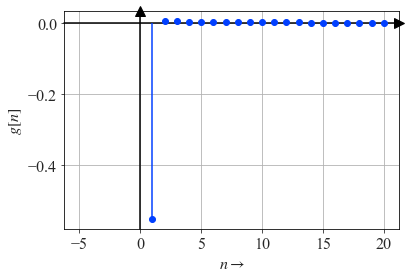

In [750]:
for k in range(0, len(p)):
    g_n = g_n + step(n-1)*(r[k]*p[k]**(n-1))
    
g_n= real(g_n)

fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"$g[n]$")

In [751]:
# Computing g[n] for the input s[n] using the dfilter :

s_n = (2*(0.9)**n)*step(n)

g_n = dfilter(b, a, s_n)

#### Plot of the output g[n] :

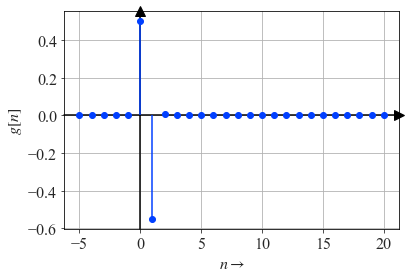

In [752]:
fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"$g[n]$")

In [753]:
# b) g[n] = s[n]−0.5s[n−1]−0.5g[n−1] +0.25g[n−2]

##### The System function was obtained as H(z) = ${ {z^2-0.5z} \over z^2+0.5z-0.25}$

In [754]:
# Hence we can write its coefficients as 

b = array([1, -0.5, 0])
a = array([1, 0.5, -0.25])

### The pole-zero plot :

(<Figure size 198.425x198.425 with 1 Axes>,
 <AxesSubplot:xlabel='$\\mathrm{Re}\\{z\\}$', ylabel='$\\mathrm{Im}\\{z\\}$'>)

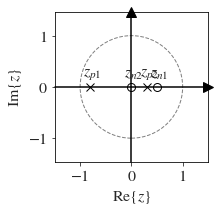

In [755]:
zplane(b, a)

In [756]:
# Obtainiing the output g[n]:

### For the output signal g[n] :

### With the given input s[n], G(z) was obtained as G(z) = ${ {2z^3-z^2} \over z^3-0.4z^2-0.7z+0.225}$

In [757]:
# Hence we can write its coefficients as 

b_out = array([2, -1, 0, 0])
a_out = array([1, -0.4, -0.7, 0.225])

In [758]:
r, p, c = residue(b_out, a_out)

In [759]:
r

array([-0.89678675,  0.64158416,  0.05520259])

In [760]:
p

array([-0.80901699,  0.9       ,  0.30901699])

In [761]:
c

array([2.])

In [762]:
g_n = c*delta(n)

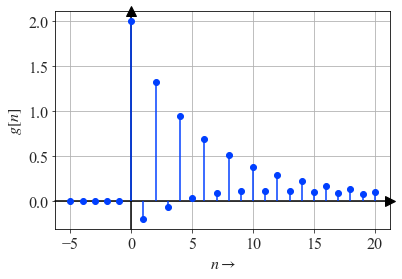

In [763]:
for k in range(0, len(p)):
    g_n = g_n + step(n-1)*(r[k]*p[k]**(n-1))
    
g_n= np.real(g_n)

fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"$g[n]$")

In [764]:
# Computing g[n] for the input s[n] using the dfilter :

s_n = (2*(0.9)**n)*step(n)

g_n = dfilter(b, a, s_n)

### Plot of the output g[n] :

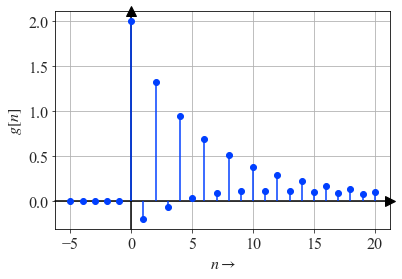

In [765]:
fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"$g[n]$")

In [766]:
# c) g[n] = 2s[n]−0.5g[n−1]


### The System function was obtained as H(z) = ${2z \over {z+1/2}}$

In [767]:
# Hence we can write its coefficients as 

b = array([2, 0])
a = array([1, 0.5])

### The pole-zero plot :

(<Figure size 198.425x198.425 with 1 Axes>,
 <AxesSubplot:xlabel='$\\mathrm{Re}\\{z\\}$', ylabel='$\\mathrm{Im}\\{z\\}$'>)

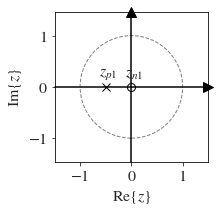

In [768]:
zplane(b, a)

In [769]:
# Obtainiing the output g[n]:

### The output signal g[n] :

### With the given input s[n], G(z) was obtained as G(z) = ${ 4z^2 \over z^2-0.4z-0.45}$

In [770]:
# Hence we can write its coefficients as 

b_out = array([4, 0, 0])
a_out = array([1, -0.4, -0.45])

In [771]:
r, p, c = residue(b_out, a_out)

In [772]:
r

array([ 2.31428571, -0.71428571])

In [773]:
p

array([ 0.9, -0.5])

In [774]:
c

array([4.])

In [775]:
g_n = c*delta(n)

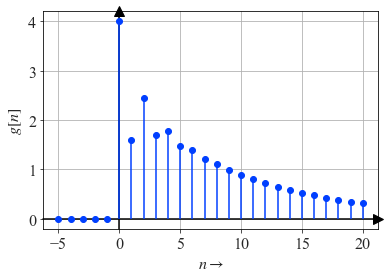

In [776]:
for k in range(0, len(p)):
    g_n = g_n + step(n-1)*(r[k]*p[k]**(n-1))
    
g_n= np.real(g_n)

fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"$g[n]$")

In [777]:
# Computing g[n] for the input s[n] using the dfilter :

s_n = (2*(0.9)**n)*step(n)

g_n = dfilter(b, a, s_n)

#### Plot of the output g[n] :

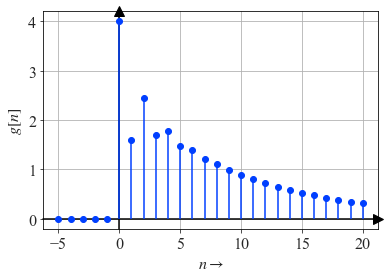

In [778]:
fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"$g[n]$")

In [779]:
# d) g[n] = 1.2s[n]+0.6s[n−1]−s[n−2]+0.4g[n−1]+0.45g[n−2]

### The System function was obtained as H(z) =  ${ {1.2z^2+0.6z-1} \over z^2-0.4z-0.45}$

In [780]:
# Hence we can write its coefficients as 

b = array([1.2, 0.6, -1])
a = array([1, -0.4, -0.45])

### The pole-zero plot:

(<Figure size 198.425x198.425 with 1 Axes>,
 <AxesSubplot:xlabel='$\\mathrm{Re}\\{z\\}$', ylabel='$\\mathrm{Im}\\{z\\}$'>)

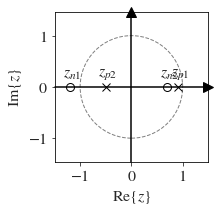

In [781]:
zplane(b, a)

In [782]:
# Obtainiing the output g[n]:

### For the output signal g[n] : 

### With the given input s[n], G(z) was obtained as G(z) =  ${ {2.4z^3+1.2z^2-2z} \over z^3-1.3z^2-0.09z+0.405}$

In [783]:
# Hence we can write its coefficients as 

b_out = array([2.4, 1.2, -2, 0])
a_out = array([1, -1.3, -0.09, 0.405])

In [784]:
r, p, c = residue(b_out, a_out)

In [785]:
r

array([3.80979592, 0.65828571, 0.51020408])

In [786]:
p

array([ 0.9,  0.9, -0.5])

In [787]:
c

array([2.4])

In [788]:
g_n = c*delta(n)

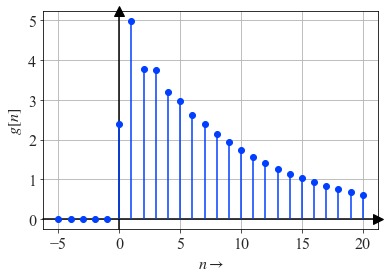

In [789]:
for k in range(0, len(p)):
    g_n = g_n + step(n-1)*(r[k]*p[k]**(n-1))
    
g_n= np.real(g_n)

fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"$g[n]$")

In [790]:
# Computing g[n] for the input s[n] using the dfilter :

s_n = (2*(0.9)**n)*step(n)

g_n = dfilter(b, a, s_n)

### Plot of the output g[n] :

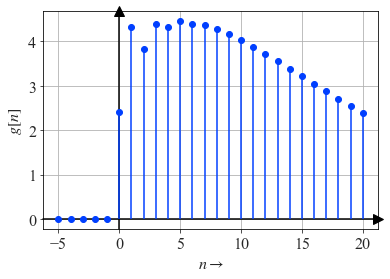

In [791]:
fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"$g[n]$")

In [792]:
# Problem 5.9 (e) :

In [793]:
b = array([1, 0.75, 0.5625, 0.4219, 0.3164])
a = array([1, 1.3333, 1.7778, 2.3704, 3.1605])

#### The pole-zero plot:

(<Figure size 198.425x198.425 with 1 Axes>,
 <AxesSubplot:xlabel='$\\mathrm{Re}\\{z\\}$', ylabel='$\\mathrm{Im}\\{z\\}$'>)

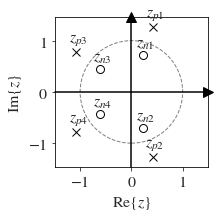

In [794]:
zplane(b, a)

In [795]:
# Obtainiing the output g[n]:

In [796]:
# With the given input s(n) the coefficients of G(z) was obtained as:

b_out = array([2, 1.5, 1.125, 0.8438, 0.6328, 0])
a_out = array([1, 0.4333, 0.5778, 0.77038, 1.0271, -2.8445])

In [797]:
r, p, c = residue(b_out, a_out)

In [798]:
r

array([-0.28323298+0.28518357j, -0.28323298-0.28518357j,
        0.34650171+0.47741201j,  0.34650171-0.47741201j,
        0.50686252+0.j        ])

In [799]:
p

array([-1.07867996+0.78371204j, -1.07867996-0.78371204j,
        0.41202351+1.2680877j ,  0.41202351-1.2680877j ,
        0.9000129 +0.j        ])

In [800]:
c

array([2.])

In [801]:
g_n = c*delta(n)

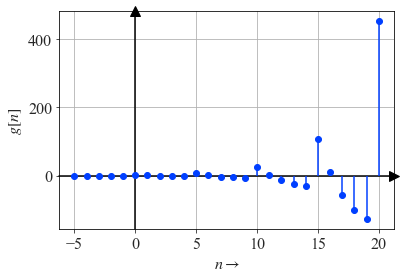

In [802]:
for k in range(0, len(p)):
    g_n = g_n + step(n-1)*(r[k]*p[k]**(n-1))
    
g_n= np.real(g_n)

fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"$g[n]$")

In [803]:
# Computing g[n] for the input s[n] using the dfilter :

s_n = (2*(0.9)**n)*step(n)

g_n = dfilter(b, a, s_n)

#### Plot of the output g[n] :

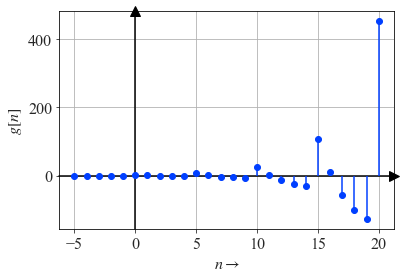

In [804]:
fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"$g[n]$")

In [1]:
### 5.9.e) $g[n] = \sum_{k=0}^{4} (\frac{4}{3})^{k} s[n−k]− \sum_{k=1}^{4} (\frac{3}{4})^{k} g[n−k]$

### When you run the command in the next code cell, the lab/homework will be finished!
### Execute the next code cell only if you really want to finish this lab/homework!
### This code cell should be your last code cell!


In [806]:
# finish homework
dsp_hw4_finish()

You are about to finish Homework 4 !
This will finish output to the log file, such that you should not enter any command after finishing!

Thus, proceed only if you are sure that you are really finished!!
Do you really want to finish? yes/no: yes
Finishing Homework 4 for matriculation number 11144732
Homework 4  finished at: 2021-12-21 00:39:27.603662
Finished after: 2 days, 2:15:04.687873
Info:  2562463468
Congratulations! You have just finished Homework 4 !
 
In your current working directory you will find the following Log file:
 
Log file:  dsp_hw4_11144732.log
 
Please save this iPython notebook one more time!
 
Please upload both files to the ILIAS server:
If this is a homework, use the 'Homework' folder of the ILIAS DSP internet pages!
If this is a lab, use the 'Lab' folder of the ILIAS DSP internet pages!
 
In either case you will be notified on the status of your submission via email.

So stay tuned!
Harald Elders-Boll


### Please save this notebook one more time!